<a href="https://colab.research.google.com/github/ldsbalu/Balu-Portfolio/blob/main/CS677_HW3_Bayesian_Linear_Regression_with_Conjugate_Priors_and_Known_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Analytical solution

By maximizing the he likelihood function, we can find and derive the analytical solution of MLE for linear regression coefficients

we know that noise variance is σ^2 and W is negative log-likelihood.
regression Model => $$
\begin{aligned}
\mathbf{y} &= \mathbf{X}\mathbf{w} + \epsilon \\
\epsilon &\sim N (0, \sigma_y^2 \mathbf{I})
\end{aligned}
$$



$\mathbf{w}^{\mathrm{MLE}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

X is design matrix of 5 degree polynomial




In [50]:
import numpy as np
import matplotlib.pyplot as plt

Loading the training Data

In [51]:
from google.colab import files
uploaded = files.upload()

In [52]:
train_data = np.loadtxt('polynomial_train.csv', delimiter=',', skiprows=1)
X_train = train_data[:, 0]
y_train = train_data[:, 1]

test_data = np.loadtxt('polynomial_test.csv', delimiter=',', skiprows=1)
X_test = test_data[:, 0]
y_test = test_data[:, 1]


In [53]:
# Creating polynomial features with degree 5
X_design_train = np.vander(X_train, N=6, increasing=True)
X_design_test = np.vander(X_test, N=6, increasing=True)

$\mathbf{w}^{\mathrm{MLE}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$


In [54]:
# Computing MLE weights with Analytical formula
w_mle = np.linalg.inv(X_design_train.T @ X_design_train) @ X_design_train.T @ y_train

In [55]:
# Generate predictions
x_grid = np.linspace(-4, 4, 200)
X_design_grid = np.vander(x_grid, N=6, increasing=True)
y_pred = X_design_grid @ w_mle

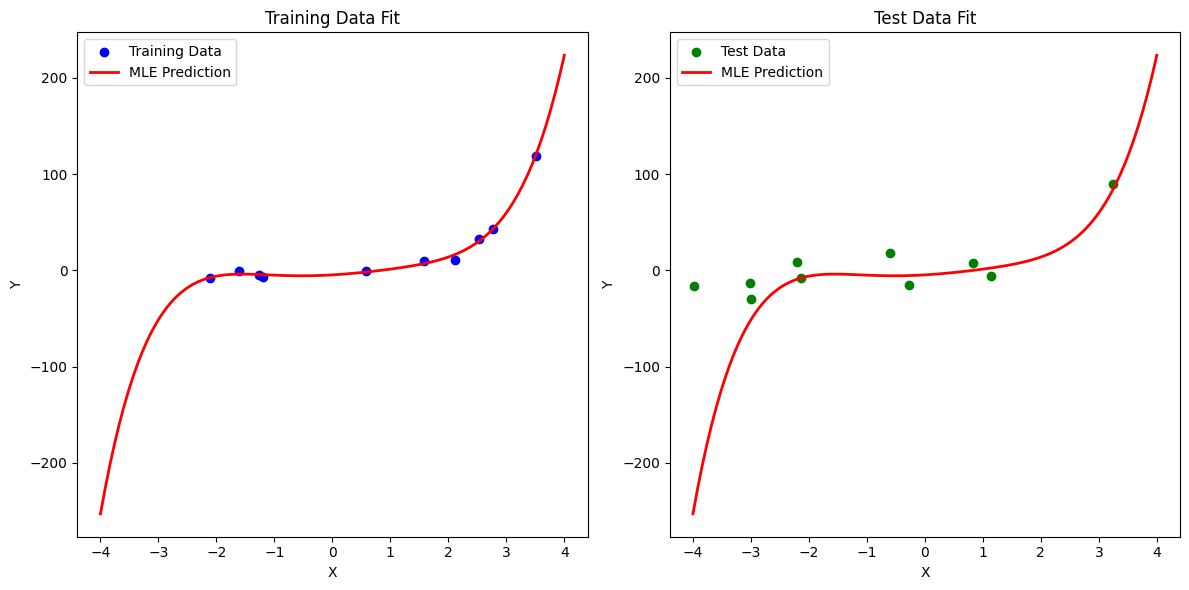

In [56]:
# Plot results
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='MLE Prediction')
plt.title('Training Data Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='MLE Prediction')
plt.title('Test Data Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

Q2. Analytical solution

The MAP maximizes the Posterior Distribution is
$p(w|D) \propto p(D|w)p(w)$

Gaussian Prior is $ p(w) = N(w|w_0, \sigma_0^2\mathbf{I}) $

likelihood is $p(D|w) = N(y|Xw, \sigma_y^2I)$

The MAP estimate minimizes the negative log-posterior:
$$
\begin{aligned}
L(w) &= \frac{1}{2\sigma_y^2}\|y - Xw\|^2 \\
&\quad + \frac{1}{2\sigma_0^2}\|w - w_0\|^2
\end{aligned}
$$

ridge regression:
$
\lambda = \frac{\sigma_y^2}{\sigma_0^2}
$


In [34]:
from scipy.optimize import minimize

In [36]:
# parametes for Prior
w0 = np.zeros(6) #mean
sigma0 = 1.0     #standard deviation
sigma_y = 10.0   # noise std

In [38]:
#creating function for negative log-posterior:
def negative_log_posterior(w):
  residual =  y_train - X_design_train @ w
  log_likelihood = -0.5 * np.dot(residual, residual) / sigma_y**2
  prior = -0.5 * np.dot(w - w0, w - w0) / sigma0**2
  return -log_likelihood - prior

In [40]:
#optimization
result = minimize(negative_log_posterior, w0, method='BFGS')
w_map = result.x

In [41]:
#generating predictions
x_grid = np.linspace(-4, 4, 200)
X_design_grid = np.vander(x_grid, N=6, increasing=True)
y_pred = X_design_grid @ w_map

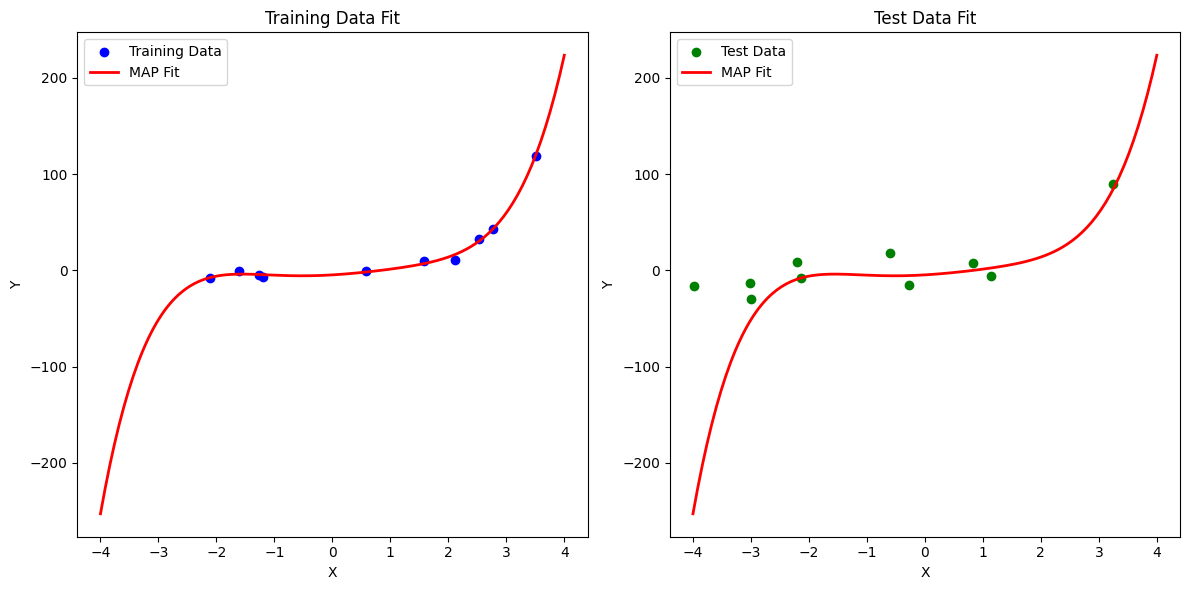

In [44]:
#plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='MAP Fit')
plt.title('Training Data Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='MAP Fit')
plt.title('Test Data Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

Q3. Posterior Inference

The posterior distribution is Gaussian:

$$
p(w|D) = N(w|w_N, v_N)
$$


with parameters:

$$
\begin{aligned}
V_N &= \left(\frac{1}{\sigma_y^2}X^TX + \frac{1}{\sigma_0^2}I\right)^{-1} \\
w_N &= \frac{1}{\sigma_y^2}V_NX^Ty
\end{aligned}
$$


Given hyperparameters :

- $\sigma_y = 10$ (known noise std)
- $\sigma_0 = 1$ (prior std)
- $w_0 = 0$ (prior mean)



In [45]:
import seaborn as sns

In [48]:
X_poly = np.vander(X_train, N=6, increasing=True)

#posterior covariance matrix
vN = np.linalg.inv(np.eye(6) / (sigma0**2) + X_poly.T @ X_poly / (sigma_y**2))
#posterior mean
wN = np.linalg.inv(X_poly.T @ X_poly / (sigma_y**2) + np.eye(6) / (sigma0**2)) @ X_poly.T @ y_train

In [59]:
#sample from posterior
np.random.seed(0)
posterior_samples = np.random.multivariate_normal(wN, vN, size=100)

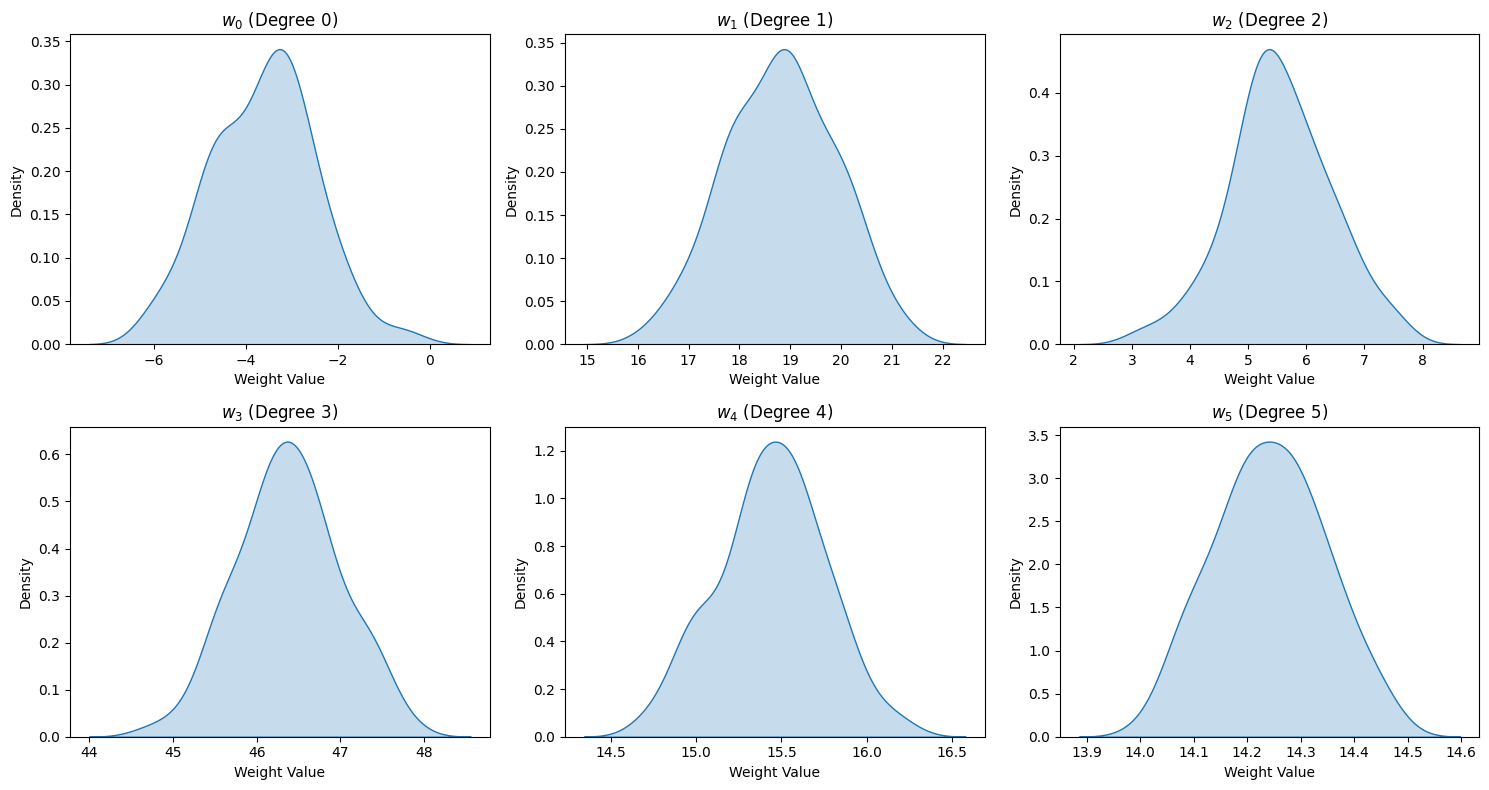

In [61]:
#ploting KDE

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i in range(6):
    sns.kdeplot(posterior_samples[:, i], ax=axes[i], fill=True)
    axes[i].set_title(f'$w_{i}$ (Degree {i})')
    axes[i].set_xlabel('Weight Value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

Q4. Posterior Predictive

The posterior predictive distribution for a new input  x is Gaussian:
$$
p(ŷ|x,D) = N(ŷ|\mu(x), \sigma^2(x))
$$


where:

$$
\begin{aligned}
\mu(x) &= w_N^T \boldsymbol{\phi}(x) \\
\sigma^2(x) &= \boldsymbol{\phi}(x)^T V_N \boldsymbol{\phi}(x) + \sigma_y^2
\end{aligned}
$$

where $w_N$ and $V_N$  are the posterior mean and covariance from Q3

In [62]:
x_grid = np.linspace(-4, 4, 200)
X_poly_grid = np.vander(x_grid, N=6, increasing=True)

In [63]:
#bayesian predictions
bayesian_predictions = X_poly_grid @ wN
predictive_variance = np.diag(X_poly_grid @ vN @ X_poly_grid.T) + sigma_y**2
predictive_std = np.sqrt(predictive_variance)

In [64]:
# MLE and MAP predictions
mle_prediction = X_poly_grid @ w_mle
map_prediction = X_poly_grid @ w_map


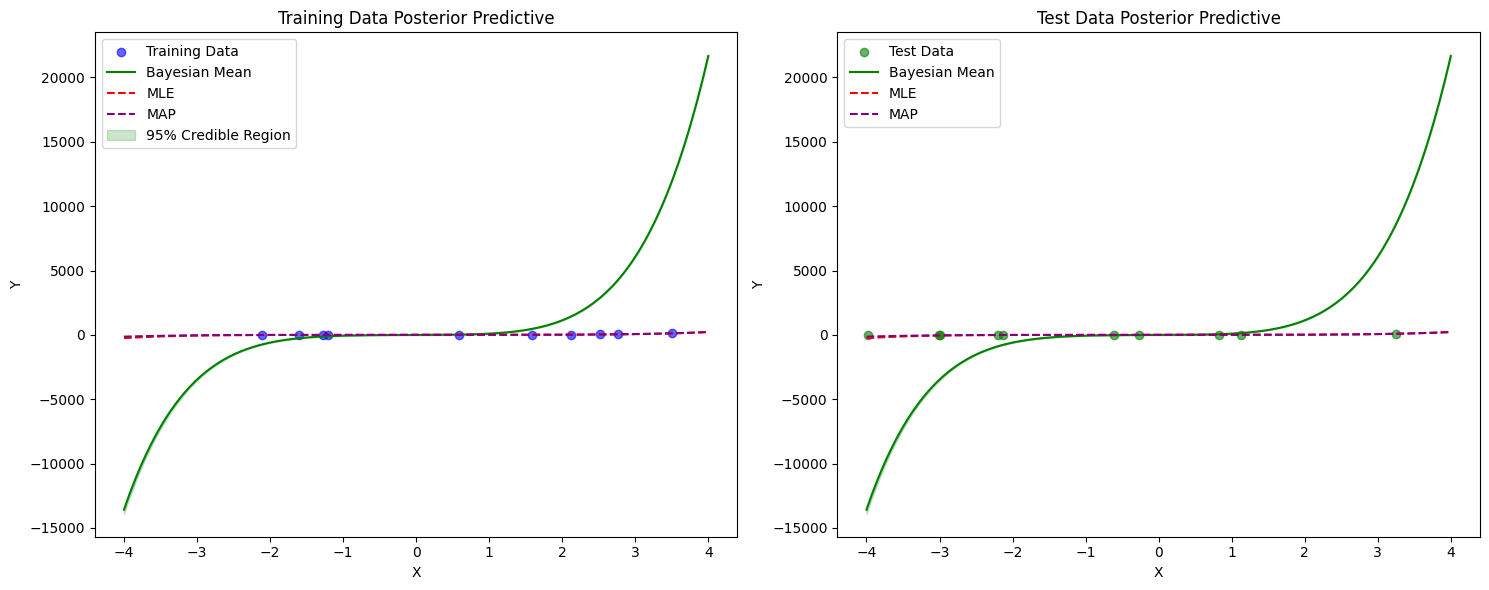

In [68]:
#plotting

plt.figure(figsize=(15, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.plot(x_grid, bayesian_predictions, color='green', label='Bayesian Mean')
plt.plot(x_grid, mle_prediction, '--', color='red', label='MLE')
plt.plot(x_grid, map_prediction, '--', color='purple', label='MAP')
plt.fill_between(x_grid, bayesian_predictions - 1.96*predictive_std,
                 bayesian_predictions + 1.96*predictive_std, color='green', alpha=0.2,
                 label='95% Credible Region')
plt.title('Training Data Posterior Predictive')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend()

# Test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test Data')
plt.plot(x_grid, bayesian_predictions, color='green', label='Bayesian Mean')
plt.plot(x_grid, mle_prediction, '--', color='red', label='MLE')
plt.plot(x_grid, map_prediction, '--', color='purple', label='MAP')
plt.fill_between(x_grid, bayesian_predictions - 1.96*predictive_std,
                 bayesian_predictions + 1.96*predictive_std, color='green', alpha=0.2)
plt.title('Test Data Posterior Predictive')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()